# Image Input

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Size
X_DIM, Y_DIM = 150, 100

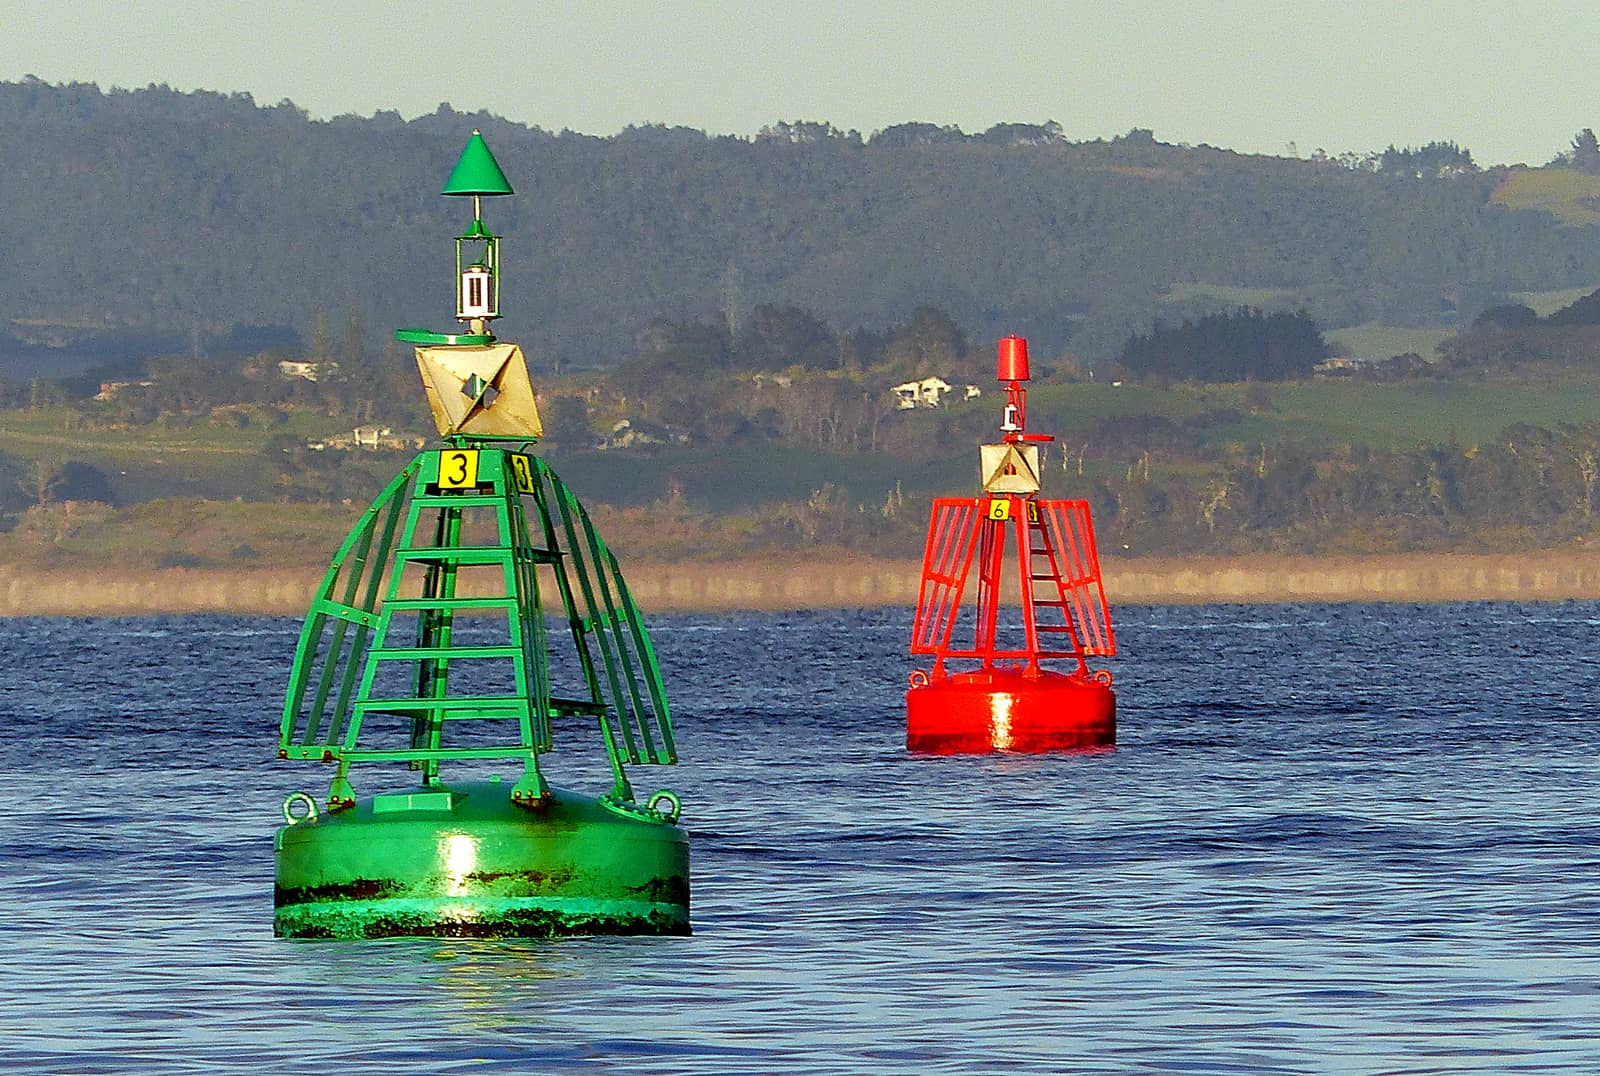

In [ ]:
im = cv2.imread('/content/drive/MyDrive/Buoys/buoys2.jpg')
cv2_imshow(im)

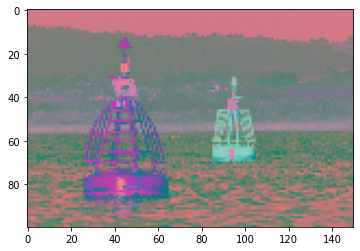

In [ ]:
im_resized = cv2.resize(im, (X_DIM, Y_DIM))
im_LAB = cv2.cvtColor(im_resized, cv2.COLOR_BGR2LAB)
plt.imshow(im_LAB)

# K-Means and STD Processing

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(im_LAB.reshape((-1, 3)))
im_kmeans = kmeans.cluster_centers_.astype(int)[kmeans.predict(im_LAB.reshape((-1, 3)))].reshape((Y_DIM, X_DIM, 3))

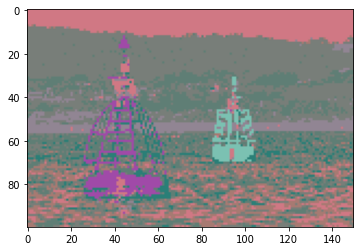

In [ ]:
plt.imshow(im_kmeans)

In [ ]:
# dummy image to demonstrate index finding method
arr = np.array([
    [[1, 1], [1, 2], [2, 3]],
    [[1, 1], [2, 2], [1, 2]],
    [[2, 2], [1, 1], [1, 2]]            
])
test = [1, 1]
np.column_stack(np.all(arr==test, axis=2).nonzero())

array([[0, 0],
       [1, 0],
       [2, 1]])

In [ ]:
stds = []
for c in kmeans.cluster_centers_.astype(int):
  y, x = np.all(im_kmeans==c, axis=2).nonzero()
  x_avg, y_avg = np.average(x),  np.average(y)
  distances = ((x-x_avg)**2 + (y-y_avg)**2)**.5
  std = np.std(distances)
  stds.append((std, c))
# there will be more than one "best color"
best = sorted(stds)[1][1]
print(best)

[160  74 168]


In [ ]:
BEST_COL = [0, 0, 0]
OTHER_COL = [255, 255, 255]

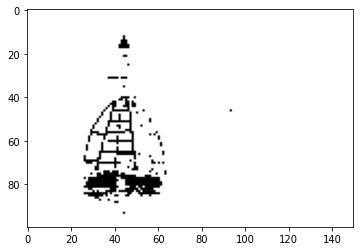

In [ ]:
im_masked = np.empty((Y_DIM, X_DIM, 3))
for y in range(Y_DIM):
  for x in range(X_DIM):
    im_masked[y, x] = BEST_COL if np.all(im_kmeans[y, x]==best) else OTHER_COL
im_masked = im_masked.astype(np.uint8)  # convert to int type
plt.imshow(im_masked)

# OpenCV Processing

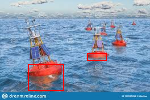

In [ ]:
im_grey = cv2.cvtColor(im_masked, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im_grey, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(im_resized, contours, -1, (0,255,0), 1)
im_markup = np.copy(im_resized)
# for pic, contour in enumerate(contours):  # draw all bounding boxes
#   x, y, w, h = cv2.boundingRect(contour)
#   cv2.rectangle(im_markup, (x, y), (x + w, y + h), (0, 0, 255), 1)
largest = sorted(contours, key=cv2.contourArea, reverse=True)[1:3]  # draw largest bounding boxes
for pic, contour in enumerate(largest):
  x, y, w, h = cv2.boundingRect(contour)
  cv2.rectangle(im_markup, (x, y), (x + w, y + h), (0, 0, 255), 1)
cv2_imshow(im_markup)

# CNN

Incorporate a CNN. Segment image into contours/bounding boxes (idk which yet), then train CNN on portions of image to tell if water or buoy. 

https://www.tensorflow.org/tutorials/images/cnn <br>
https://keras.io/examples/vision/image_classification_from_scratch/

In [ ]:
# inferencing on image segments